# DS102 | In Class Practice Week 3B - Data Visualisation I
<hr>

## Learning Objectives
At the end of the lesson, you will be able to:

- identify key features of a chart including its title, $x$-axis, $y$-axis, tickers and legend

- understand `matplotlib` plotting concepts including `Figure` and `Axes`

- create a **line graph** using one `Series` with `matplotlib` library and `seaborn` library

- create a **scatterplot** using one `DataFrame` with `matplotlib` and `seaborn` library

- create a **bar graph** using one `DataFrame` with `matplotlib` library and `seaborn` library

- create a **clustered bar graph** from one `DataFrame` with multiple columns

- create a **boxplot** using numerical data with `matplotlib` library and `seaborn` library

- `DataFrame.merge()` two dataframes together with a common column name

- use `Series.corr()` to find the correlation coefficient between two `Series`

## Datasets Required for this In Class

In the order they are introduced: 
1. `korea-tourist-arrivals.csv`

2. `sgp-births.csv`

3. `patient-admissions.csv`

4. `patient-admissions-by-gender.csv`

5. `wages-by-occupation.csv`

6. `goog-close.csv`

7. `aapl-close.csv`

8. `kor-tourist-departures.csv`


## Import libraries & settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.1f}'.format
# Plot inline in Jupyter notebook
%matplotlib inline
# Width = 16, Height = 6
DIMS=(16, 6)

## Identify Key Features of a Graph

A good graph should contain the following features so it can easy to read and interpret:

- Title
- Legend
- Axes Labels for both the horizontal or $x$-axis and the vertical or $y$-axis
- Reasonable tick values

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticks.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

In [7]:
## Dataset 1: Credits at the end of the notebook
kto_arr_df = pd.read_csv('kor-tourist-arrivals.csv')

print(kto_arr_df.describe())
print()

# Exercise: What does this line do?

kto_arr_df['visitor_arrivals_m'] = kto_arr_df['visitor_arrivals'].apply(lambda x : x/1000000)
print(kto_arr_df.describe())
print()
print(kto_arr_df.head())

         year  visitor_arrivals
count    19.0              19.0
mean  2,005.0       6,964,907.6
std       5.6       2,967,252.1
min   1,996.0       3,683,779.0
25%   2,000.5       4,949,983.0
50%   2,005.0       6,022,752.0
75%   2,009.5       8,307,595.5
max   2,014.0      14,201,516.0

         year  visitor_arrivals  visitor_arrivals_m
count    19.0              19.0                19.0
mean  2,005.0       6,964,907.6                 7.0
std       5.6       2,967,252.1                 3.0
min   1,996.0       3,683,779.0                 3.7
25%   2,000.5       4,949,983.0                 4.9
50%   2,005.0       6,022,752.0                 6.0
75%   2,009.5       8,307,595.5                 8.3
max   2,014.0      14,201,516.0                14.2

   year  visitor_arrivals  visitor_arrivals_m
0  1996           3683779                 3.7
1  1997           3908140                 3.9
2  1998           4250216                 4.3
3  1999           4659785                 4.7
4  2000     

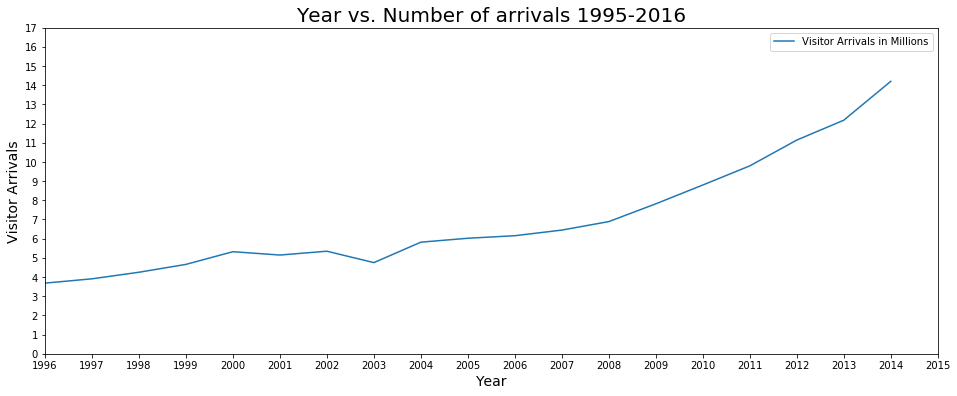

In [15]:
# Identify features of a plot. Run this code to see the plot.
# In this example, we want to visualize the relationship between the year and number of visitor arrivals.

# Create your fig and axes
fig = plt.figure(figsize= DIMS)
ax = fig.add_subplot(111)

# Set the title of the subplot
ax.set_title("Year vs. Number of arrivals 1995-2016", fontsize = 20)

# Plot from the df
kto_arr_df.plot(x = 'year', y = 'visitor_arrivals_m', kind = 'line', ax = ax)

# Configure the ticks and labels of the x-axis...
# Let's configure it to show labels from 1996-2016
plt.xticks(range(1996,2016))
plt.xlabel("Year", fontsize =14)

# ...and y-axis from 0-17M
plt.yticks(range(0,18))
plt.ylabel("Visitor Arrivals", fontsize=14)

# Add the legend
ax.legend(['Visitor Arrivals in Millions'])

plt.show()

In this example, the **title** is present and explains the purpose of the graph. We are looking at trends of tourist arrivals in S Korea over 20 years. The **$x$ and $y$ axes** are labelled and, where necessary, the **unit** is also appropriately specified. For each year, the corresponding number of arrivals is stated (in millions). Finally, the **legend** is at the top-right hand corner. The blue line is stated. 

## Line Graph

A line graph is used to show **a trend in data over time**, or **time-series** data. The $x$-axis will have the various time periods (year, month, day, quarter etc.) and the $y$-axis will show the metric. 

In [17]:
## Dataset 2: Credits at the end of the notebook
births_df = pd.read_csv('sgp-births.csv')
births_df.head()

,Year,Total Live-births,1st Live-birth
0,1977,38364,16138
1,1978,39441,16424
2,1979,40779,17253
3,1980,41217,17968
4,1981,42250,18599


To plot a line graph, simply use the `df` variable's `plot` function. Specify the following parameters: 
- the `kind` of graph to plot: `'line'` in this case

- `x` for the `Series` representing the $x$-axis

- `y` for the `Series` representing the $y$-axis 

- `marker` to denote the shape of each coordinate on the chart. `'D'` to represent a shaded diamond

- `figsize` which is a tuple representing the `(width, height)` of the plot image.

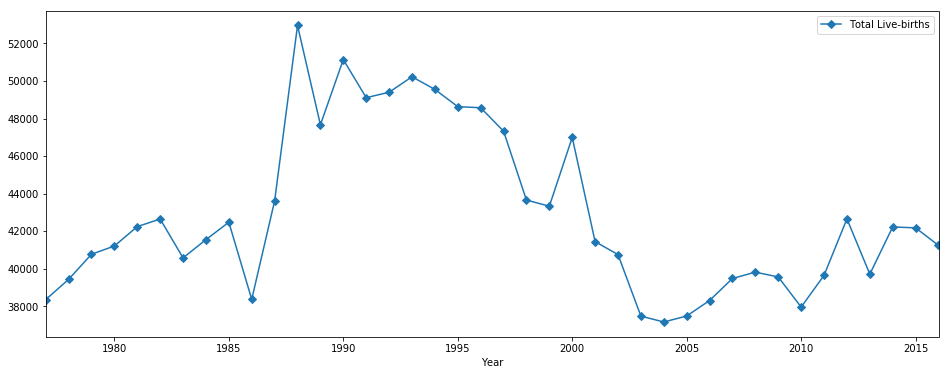

In [18]:
# Plot a line graph using df.plot(). 
# Specify the x, y, kind, marker and figsize parameter.

births_df.plot(x='Year', y='Total Live-births', kind='line', marker='D', figsize=DIMS)

We now have our plot. However, some key features are missing from the plot. The **$y$-axis is not labelled**. Also, the **title is missing**. Use `ax1.set_ylabel()` and `ax1.set_title()` respectively to add them. Set the label of the $y$-axis after plotting.

Also, it is useful to adjust the `xticks` and `yticks`. Use `ax1.set_xticks()` and `ax1.set_yticks()`. The parameter is an `numpy.arange(min, max, step)`, all `int`s. The first two values represent the lower and upper limits of your graph. The last value represents the frequency of each tick. The smaller the frequency, the more "ticks" you see on the graph.

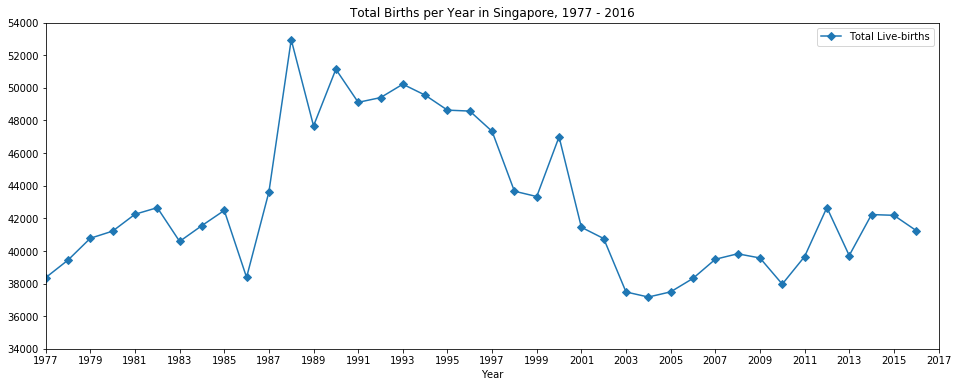

In [37]:
# Always start by creating a figure and adding (empty) subplots.
fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)

# Set the title here
ax1.set_title("Total Births per Year in Singapore, 1977 - 2016")

# Plot the df here. specify the kind, x, y, figsize, marker='X' and ax params
births_df.plot(x='Year', y='Total Live-births', kind='line', ax=ax1, marker='D', figsize=DIMS)

# Adjust the ticks for both x and y axes
ax1.set_xticks(range(1977,2018,2))

# Set the y axis label here
ax1.set_yticks(range(34000,55000,2000))


plt.show()


After completing the plot, attempt to write a conclusion with it. Do this in Markdown.

https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

Conclusion: Total births grew rapidly from 1977 to 1988, where it reached a maximum of about 53000. 

Then, it experienced a decline to an average of 40000 births from 2007 to 2016.

## Bar Graph

Bar graphs are used to examine **cross-sectional** or **categorical** data. This involves looking at different **segments** of the population at **one point in time**. It could mean observations at a certain year, quarter or month.

In [24]:
## Dataset 3: Credits at the end of the notebook
# Read patient-admissions.csv into admissions_df
admissions_df = pd.read_csv('patient-admissions.csv')
admissions_df

,year,gender,age,percentage
0,2014,Male,0 - 14,18.6
1,2014,Male,15 - 64,51.6
2,2014,Male,65 and above,29.8
3,2014,Female,0 - 14,13.9
4,2014,Female,15 - 64,57.9
5,2014,Female,65 and above,28.2


In [26]:
# Create a copy of the df
admissions_g_df = admissions_df.copy()

# Perform the filtering: create dataset of only Male, or Female patients
admissions_g_df = admissions_g_df[admissions_g_df['gender'] == 'Female']
admissions_g_df

,year,gender,age,percentage
3,2014,Female,0 - 14,13.9
4,2014,Female,15 - 64,57.9
5,2014,Female,65 and above,28.2


If you have only 1 plot, you can use `fig, ax = plt.subplots()` to get the `fig` and `ax` variables. 

**Note:** In Python, a function can have multiple return variables. The order of the return variables **must be adhered to**.

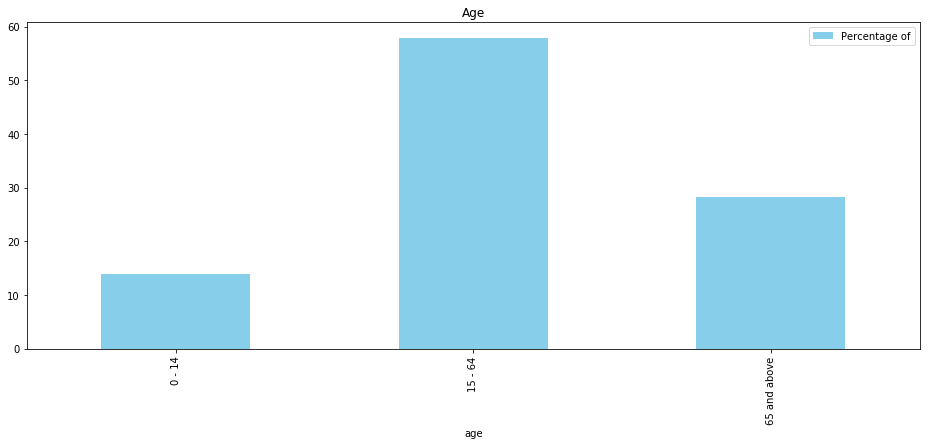

In [36]:
fig, ax = plt.subplots()
# Your turn: Plot a bar plot describing the percent of patient admissions per age group.
# Specify the kind, x, y, figsize, ax and color='skyblue' params
admissions_g_df.plot(x='age', y='percentage', kind='bar', ax=ax, color='skyblue', figsize=DIMS)

ax.set_title("Age")
plt.legend(['Percentage of'])

# Add the ylabel using ax.set_ylabel() and the title using ax.set_title()

plt.show()

## Clustered Bar Graph

To show comparisons **within a cohort**, use a clustered bar graph. This will show the differences within groups, across the segments determined by the $x$-axis. 

In [ ]:
## Dataset 3: Credits at the end of the notebook
# Read patient-admissions-by-gender.csv into admissions_df
admissions_by_gender_df = pd.read_csv('patient-admissions-by-gender.csv')
admissions_by_gender_df

To plot a clustered bar plot, add **both** `Series` to the same subplot. Use `ax=ax` to for this. For the `position` parameter, the **rightmost bar is the smallest number**, starting from `1`. The `width` of the bar needs to be adjusted too. Finally, for the `color` value, use [this link](https://python-graph-gallery.com/100-calling-a-color-with-seaborn/) to find good color representations that are soothing for the eye.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

In [ ]:
width=0.20 # what is this parameter for?

# Create the figure
fig = plt.figure(figsize=DIMS)
# Add the subplot
ax = fig.add_subplot(111)

# Plot the values for 'male_percentage' Specify position=1, color='steelblue' and width
admissions_by_gender_df.plot(kind='', x='', y='', 
                             ax=ax, position=1, width=width, color='')

# Plot the values for 'female_percentage' Specify position=2

# Your turn: Add the title of the plot and set y axis

plt.show()

## Boxplot

A boxplot is useful to check for outliers in a dataset. To plot a boxplot, simply use `plot(kind='box')` for the `Series`.

In [ ]:
## Dataset 4: Credits at the end of the notebook
# Read 'wages-by-occupation.csv' into a df called wages_df. Then use describe() to understand more about wages_df.
wages_df = pd.read_csv('wages-by-occupation.csv')
wages_df.describe()

In [ ]:
# For box plots, you can only plot using a Series.
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the boxplot. On top of kind, title and ax parameters, try using figsize=(3,6)
# Here, we are calling the plot() function on a Series, not a DataFrame.
wages_df['Weekly_Wage_USD'].plot(...)

# Set the label of the y-axis


plt.show()

The box plot shown has many useful features. The bottom and top of the box represents the 25th percentile and the 75th percentile respectively. The line in the middle of the box is the 50th percentile or median. The whiskers represent the lower and upper bound calculated by adding and subtracting $1.5\times IQR$ from the first and third quartile respectively. Any value outside the whiskers are outliers. You can validate this using `df.describe()`.

## Scatterplot
A scatter graph can be used to **spot relationships between variables**. Each axis represents a variable, and each coordinate represents the *joint observation* of both variables. The closer all the points are closer to some defined line (linear, quadratic, exponential etc.), the stronger the correlation between the variables *based on that function*.

In [ ]:
## Dataset 5 & 6: Credits at the end of the notebook
# Your turn: read goog-close.csv to goog_df and read aapl-close.csv into aapl_df
#
goog_df = pd.read_csv('goog-close.csv')
aapl_df = pd.read_csv('aapl-close.csv')
print(goog_df.head())
print(aapl_df.head())

### A small detour: `df.merge()`
Use `DataFrame.merge(df)` to combine 2 `df`s with a common column to just one, with the individual columns preserved. The `on` parameter takes a list of columns which is common in **both** `DataFrame`s.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [ ]:
# Use df.merge to combine into 1 df called tech_shares_df
# Specify on='Date'

# Note: The order of the df is not important. This is an associative operation

In [ ]:
tech_shares_df.describe()

In [ ]:
tech_shares_df.info()

Note that all the columns now have numeric datatypes, which means they can be plotted.

To plot a scatter plot, use `df.plot()`. Fill in `kind='scatter'` to indicate a scatter plot. Specify the $x$ and $y$ axes using the name of the columns. Also, specify the `title`. For both axes, the axis label is the name of the column.

In [ ]:
tech_shares_df.plot(kind='scatter', x='', y='', figsize=(7, 7),
                    title="Scatterplot of AAPL Closing Price vs. GOOG Closing Price, 2017 Oct - 2018 Oct")
plt.show()

Also, it is useful to see how related the datasets are using `df['colname'].corr()`.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

**Conclusion**: With a (Pearson) correlation $\rho=0.732$, the closing price of GOOG and AAPL have strong correlation. Note that strong correlation does **not imply** causation, which means the change in one variable directly causes the change in another variable. In this case, closing price of AAPL does **not necessarily directly impact** the closing price of GOOG. Additional research needs to be performed to ascertain this relationship.

<div class="alert alert-info">
<b>DS102 Learning Guidelines: Additionally, </b> $\rho = r$. Hence, if you intend to perform linear regression on these two security closing prices, you can find $r^2$ by taking the square of the correlation. Linear regression will be covered in Week 5.
</div>

**Exercise**

You are given the departures of South Koreans per year in the file `kor-tourist-departures.csv`. Using the data, plot a line graph showing the trend of departures in S Korea in the time period. All the features of the graph **must be shown**. 

In [ ]:
## Dataset 7: Credits at the end of the notebook
# Exercise: Read kor-tourist-departures.csv into a df called kto_depart_df
#
kto_depart_df = pd.read_csv('kor-tourist-departures.csv')

# Exercise: Add a column called 'visitor_departures_m'. This is the column 'visitor_departures'
# divided by 1000000
#
kto_depart_df['visitor_departures_m'] = kto_depart_df['visitor_departures'].apply(lambda n : n/1000000)

In [ ]:
# Plot the line graph where the x-axis is the year and the y-axis is the no. of tourists, in millions
fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)

# Your turn: add your code below


**Libraries**
- [matplotlib](https://matplotlib.org/gallery/index.html)
- [seaborn](https://seaborn.pydata.org/examples/index.html)

**Credits**
- [Korea Tourism Organisation](https://kto.visitkorea.or.kr/eng/tourismStatics/keyFacts/visitorArrivals.kto) for Dataset 1 & 7
- [Singstat](https://www.singstat.gov.sg/find-data/search-by-theme/population/births-and-fertility/latest-data) for Dataset 2
- [data.gov.sg](https://data.gov.sg/dataset/hospital-admissions) for Dataset 3
- [Kaggle](https://www.kaggle.com/monkeasy/exploring-gender-equality-in-us-wages/data) for Dataset 4
- [Yahoo Finance GOOG](https://finance.yahoo.com/quote/GOOG) and [Yahoo Finance AAPL](https://finance.yahoo.com/quote/AAPL) for Dataset 5 & 6


**Liability Disclaimer**
<p style="font-size:10px">Notwithstanding any other provision of other agreements between Hackwagon and its trainees, in no event shall any party be liable to another party for any loss of anticipated profits or other consequential, special or indirect loss or damage of any nature arising at any time, whether arising under contract, tort (including negligence), strict liability or for any other cause whatsoever. The trainee understands and agrees that algorithms taught for financial markets are volatile and unpredictable in nature and that no warranty, either express or implied, is made by the company with respect thereto. By continuing with the lesson, the trainee agrees implicitly with the statements prior.</p>